# Evaluate Fisher information

Johann Brehmer, Kyle Cranmer, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')

In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [9]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma/'

## Calculate Fisher information

In [4]:
fisher = FisherInformation(sample_dir + 'samples.h5', debug=False)

16:14  
16:14  ------------------------------------------------------------
16:14  |                                                          |
16:14  |  MadMiner v2018.10.12                                    |
16:14  |                                                          |
16:14  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:14  |                                                          |
16:14  ------------------------------------------------------------
16:14  
16:14  Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
16:14  Found 2 parameters:
16:14     cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.1, 0.1))
16:14     cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.1, 0.1))
16:14  Found 6 benchmarks:
16:14     sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
16:14     morphing_basis_vector_1: cWWW = -9.39e-02, cWWWtilde = 0.07
16:14     morphing_basis_vector_2: cWWW = 0.

In [6]:
fisher_info_xsec = fisher.calculate_fisher_information_rate(
    theta=[0.,0.],
    luminosity = 300000.
)

In [7]:
fisher_info_truth = fisher.calculate_fisher_information_full_truth(
    theta=[0.,0.],
    luminosity = 300000.
)

In [10]:
model_filenames = ['sally_all', 'sally_pts', 'sally_deltaphis']
features = [None, [0, 4, 9], [21,22,25]]
scores = []
fisher_infos_detector = []

for filename, feature in zip(model_filenames, features):
    fisher_infos_detector.append(
        fisher.calculate_fisher_information_full_detector(
            theta=[0.,0.],
            luminosity = 300000.,
            model_file = model_dir + filename,
            unweighted_x_sample_file = sample_dir + 'test_local/x_test.npy',
            features = feature
        )
    )
    
fisher_infos_detector = np.array(fisher_infos_detector)

16:21  
16:21  ------------------------------------------------------------
16:21  |                                                          |
16:21  |  MadMiner v2018.10.12                                    |
16:21  |                                                          |
16:21  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:21  |                                                          |
16:21  ------------------------------------------------------------
16:21  
16:21  Loading settings from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_all_settings.json
16:21    Found method sally, 27 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function
16:21  Loading state dictionary from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_all_state_dict.pt
16:21  Loading evaluation data
16:21  Starting score evaluation
16:21  Expected score (should be close to zero): [-0.103676

## Fisher information contours

In [31]:
fisher_infos = np.array([fisher_info_truth, fisher_info_xsec] + list(fisher_infos_detector))
labels = ['all-knowing', 'xsec', 'all', r'$p_T$', r'$\Delta \phi$']

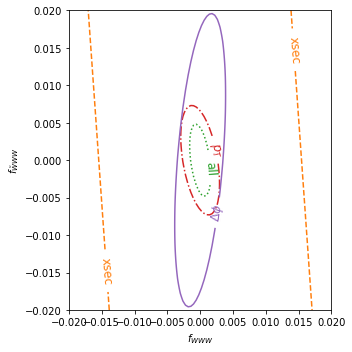

In [34]:
xmax = 0.02

fig = plot_fisher_information_contours_2d(
    fisher_information_matrices=100. / 300. * fisher_infos,
    contour_distance=1.,
    xrange=(-xmax,xmax),
    yrange=(-xmax,xmax),
    xlabel=r'$f_{WWW}$',
    ylabel=r'$f_{\tilde{W}WW}$',
    matrix_labels=labels
)

plt.savefig('first_plot_wgamma.pdf')